# Importing Python modules

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis

In [120]:
df = pd.read_csv('CustomerData.csv')
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


# Commons Questions in Data Analysis

    1. Dimension
    2. Features and Data Types
    3. Categorical and Numerical
    4. Distribution in the Data
    5. Correlation between the features
    6. Factor Analysis

In [121]:
df.shape

(3209, 14)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    3209 non-null   int64  
 1   City                          3209 non-null   int64  
 2   NoOfChildren                  3209 non-null   int64  
 3   MinAgeOfChild                 3209 non-null   int64  
 4   MaxAgeOfChild                 3209 non-null   int64  
 5   Tenure                        3209 non-null   int64  
 6   FrquncyOfPurchase             3209 non-null   int64  
 7   NoOfUnitsPurchased            3209 non-null   int64  
 8   FrequencyOFPlay               3209 non-null   int64  
 9   NoOfGamesPlayed               3209 non-null   int64  
 10  NoOfGamesBought               3209 non-null   int64  
 11  FavoriteChannelOfTransaction  3209 non-null   object 
 12  FavoriteGame                  3209 non-null   object 
 13  Tot

**CustomerID - nominal level and unique**
**City, FavoriteChannelOfTransaction, FavoriteGame** - Catogorical information
 - Rest all are numerical information

In [123]:
df.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [124]:
numerical_data = df.drop(['City', 'FavoriteChannelOfTransaction', 'FavoriteGame', 'CustomerID'], axis=1)
catgorical_data = df[['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']]

In [125]:
numerical_data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
0,2,3,8,210,11,11,2344,108,10,107.51
1,2,3,6,442,20,20,245,22,7,382.40
2,4,3,5,424,18,18,1059,130,18,135.01
3,1,6,6,261,11,9,365,34,11,125.00
4,3,6,9,422,44,31,1066,102,44,335.05


In [126]:
catgorical_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


<Axes: >

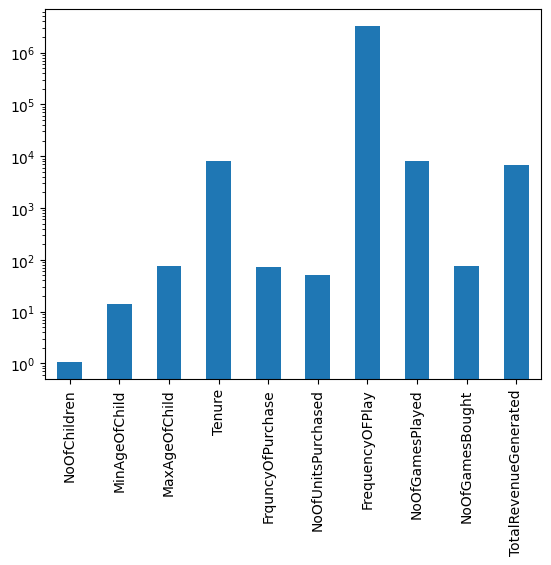

In [127]:
numerical_data.var().plot(kind='bar', logy=True)

In [128]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

<Axes: >

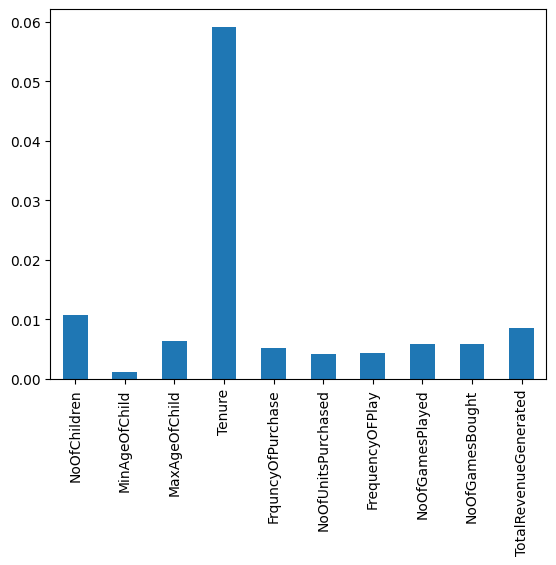

In [129]:
pd.DataFrame(sc.fit_transform(numerical_data), columns=numerical_data.columns).var().plot(kind='bar')

**Tenure - has large variance**

**MinAge of Child - has lowest variance**

In [130]:
catgorical_data.head()

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform


<Axes: ylabel='proportion'>

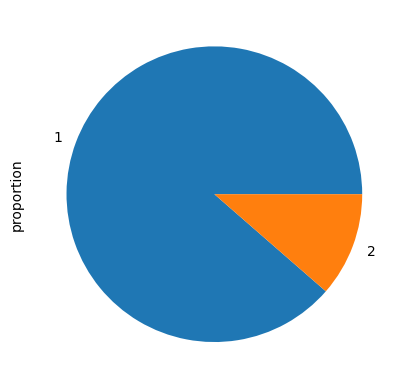

In [131]:
catgorical_data['City'].value_counts(normalize=True).plot(kind='pie')

In [132]:
catgorical_data['City'].value_counts(normalize=True)

City
1    0.885946
2    0.114054
Name: proportion, dtype: float64

FavoriteChannelOfTransaction
Favorite    0.821751
Uniform     0.178249
Name: proportion, dtype: float64

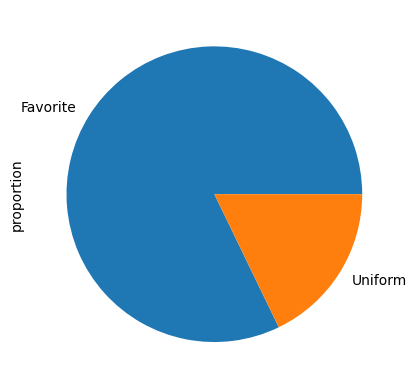

In [133]:
catgorical_data['FavoriteChannelOfTransaction'].value_counts(normalize=True).plot(kind='pie')
catgorical_data['FavoriteChannelOfTransaction'].value_counts(normalize=True)

FavoriteGame
Uniform     0.951387
Favorite    0.039265
NONE        0.009349
Name: proportion, dtype: float64

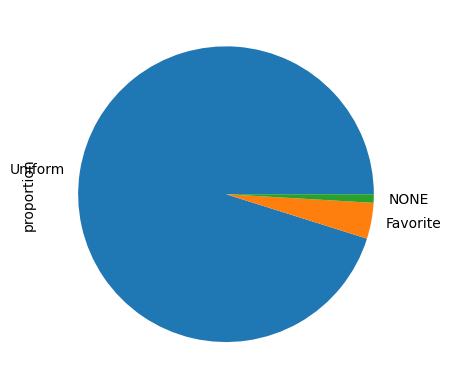

In [134]:
catgorical_data['FavoriteGame'].value_counts(normalize=True).plot(kind='pie')
catgorical_data['FavoriteGame'].value_counts(normalize=True)

# Correlation

In [135]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [136]:
numerical_data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
0,2,3,8,210,11,11,2344,108,10,107.51
1,2,3,6,442,20,20,245,22,7,382.40
2,4,3,5,424,18,18,1059,130,18,135.01
3,1,6,6,261,11,9,365,34,11,125.00
4,3,6,9,422,44,31,1066,102,44,335.05


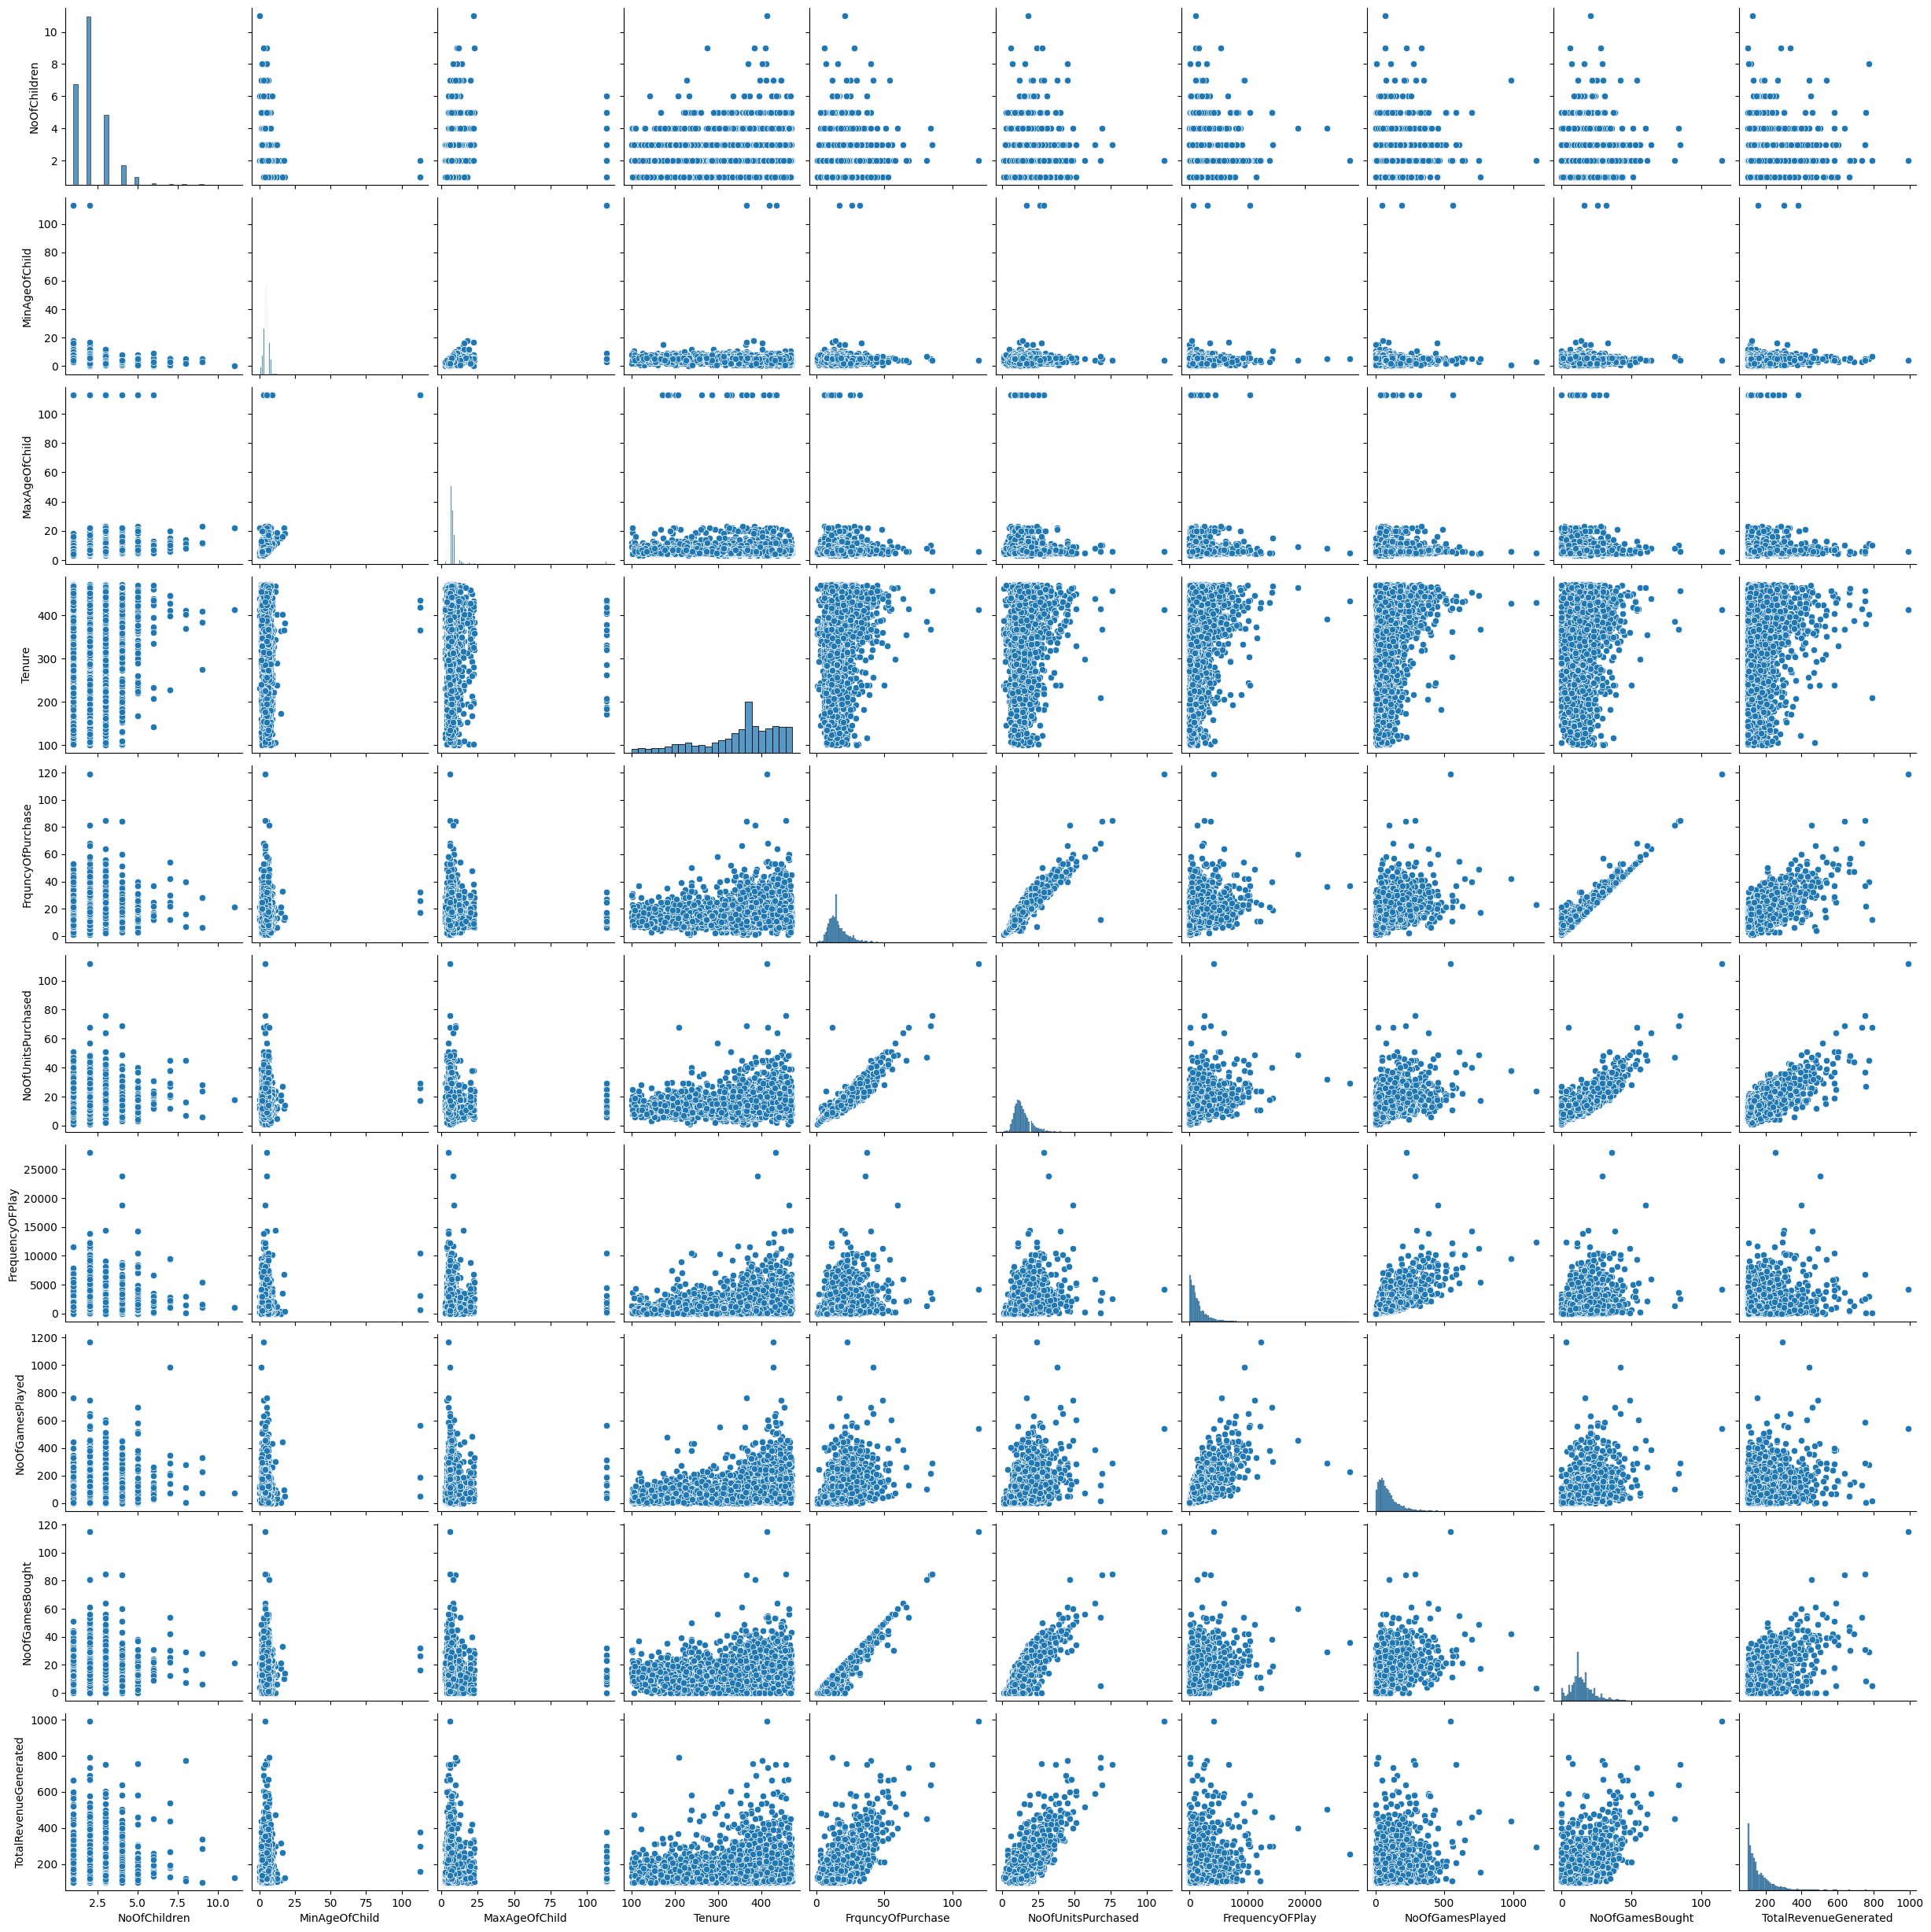

In [137]:
sns.pairplot(numerical_data)

<Axes: >

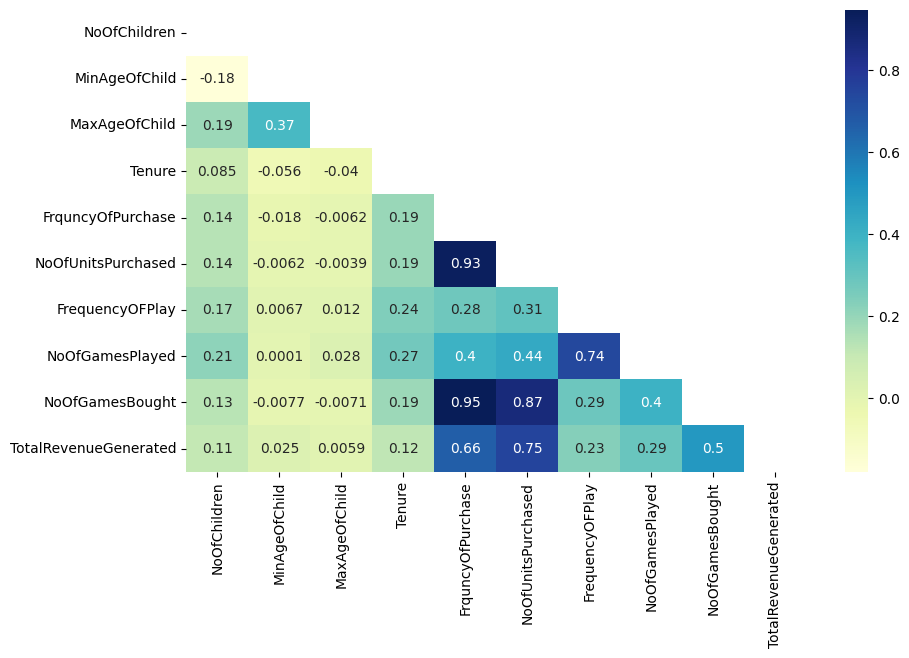

In [138]:
plt.figure(figsize=(10,6))
corr = numerical_data.corr()

# mask
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=mask)

# Multi Colinearity
    - no. of unitspurchased, freqofpurchase, no. of gamesbought
    - no. of gamesplayed, frequency of play
- Frequency of purchase, No.units purchased has high correlation wrt total revenue generated

## Factor Analysis

In [139]:
df.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


C:\Temp\ipykernel_2156\1602218554.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.catplot(x = 'City', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)


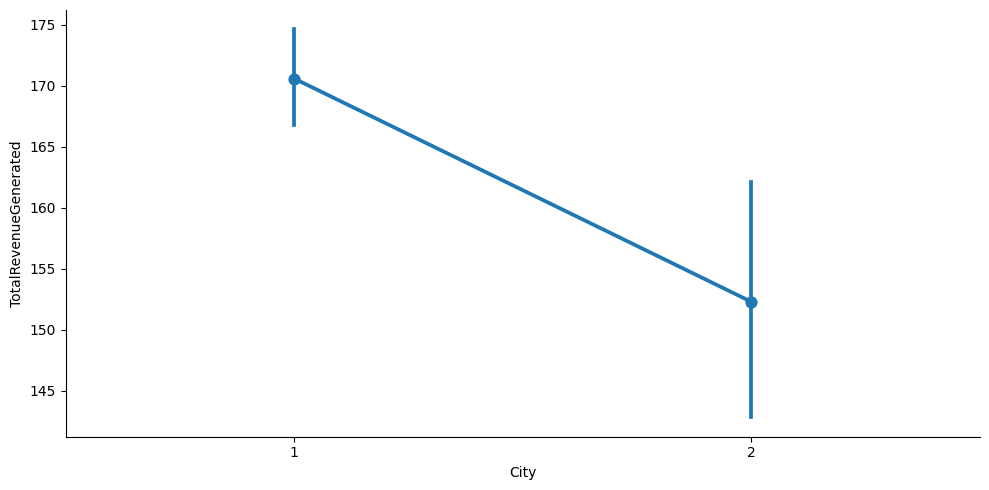

In [140]:
sns.catplot(x = 'City', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)

C:\Temp\ipykernel_2156\3103434718.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.catplot(x = 'FavoriteChannelOfTransaction', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)


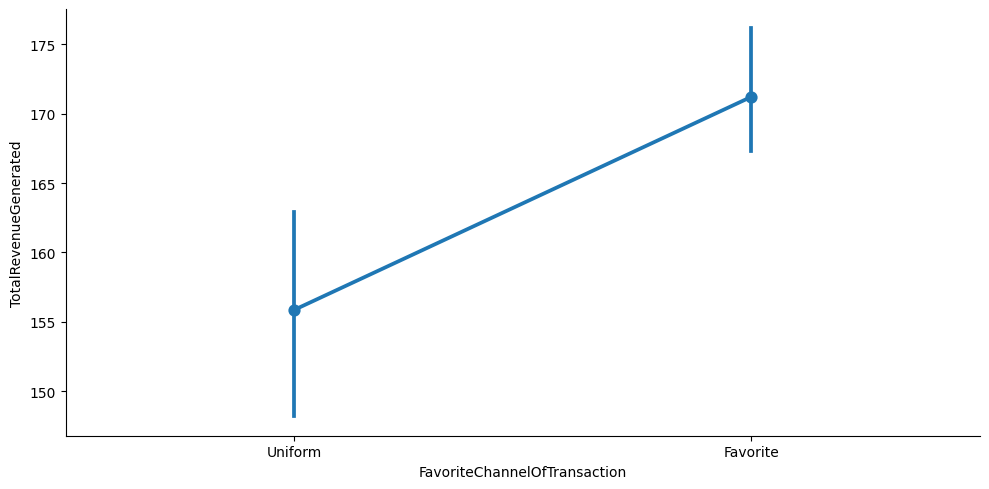

In [141]:
sns.catplot(x = 'FavoriteChannelOfTransaction', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)

C:\Temp\ipykernel_2156\1695424005.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.catplot(x = 'FavoriteGame', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)


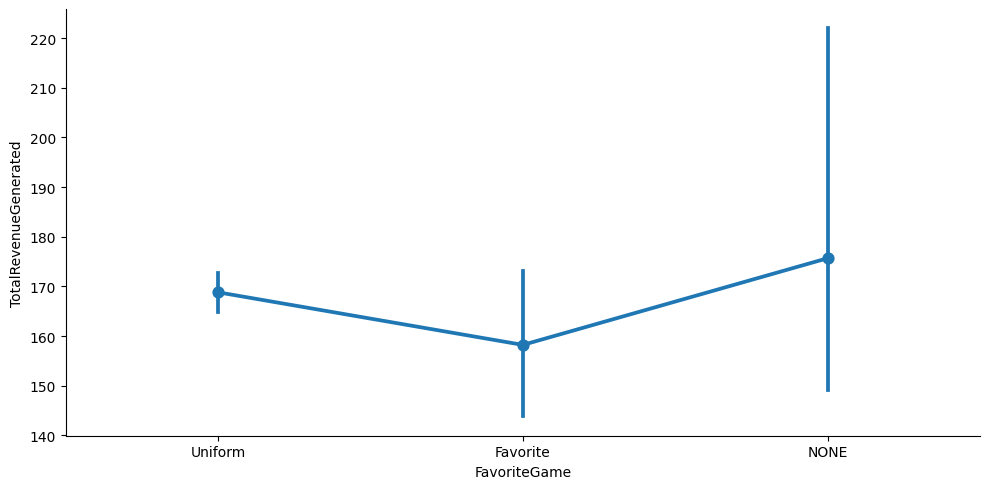

In [142]:
sns.catplot(x = 'FavoriteGame', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)

C:\Temp\ipykernel_2156\3940767996.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.catplot(x = 'NoOfChildren', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)


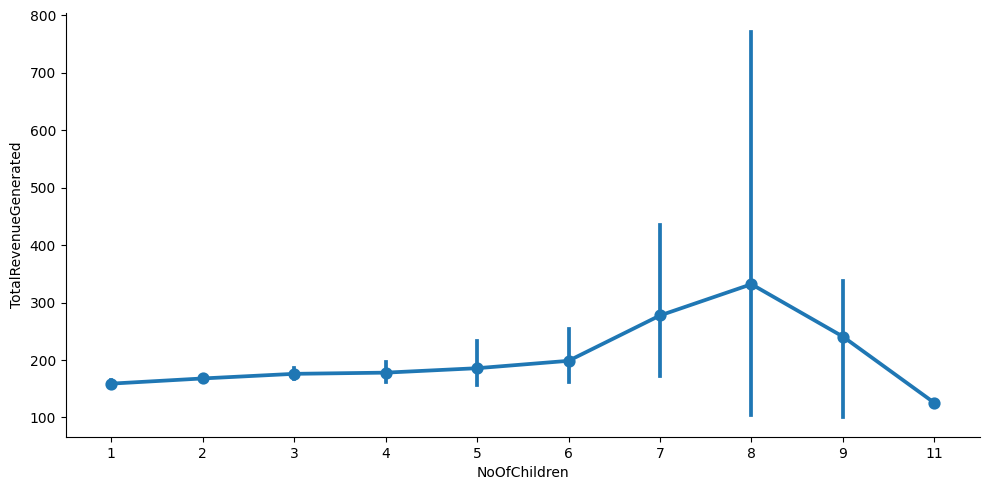

In [143]:
sns.catplot(x = 'NoOfChildren', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)

C:\Temp\ipykernel_2156\3444853460.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sns.catplot(x = 'FrquncyOfPurchase', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)


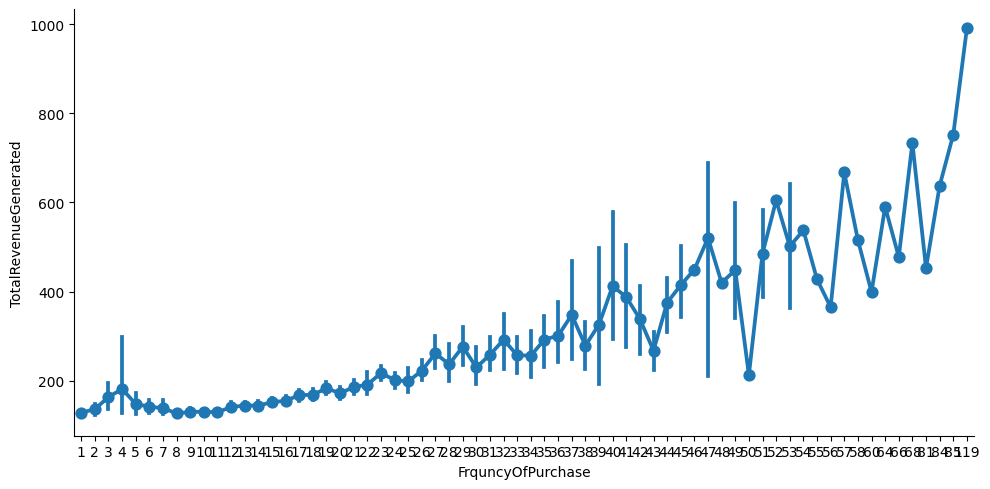

In [144]:
sns.catplot(x = 'FrquncyOfPurchase', y = 'TotalRevenueGenerated', kind='point', ci=99, data=df, aspect=2)

## Conclusion:
    1. **CustomerID** is unique key and has to drop it.
    2. **City, FavoriteChannelOfTransaction, FavoriteGame** are categorical variables for that we need to create n - 1 dummies.
    3. **Tenure** has highest variance whereas **MinAgeOfChild** has least variance.
    4. From pairplot **MinAgeOfChild** and **MaxAgeOfChild** has outlier.
    5. There is **MultiColinearity** effect between the variables.
        -- FreqOfPurchase & NoOfUnitsPurchased
        -- FreqOfPurchase & NoOfGamesBought
        -- NoOfUnitsPurchased & NoOfGamesBought
        -- FreqOfPlay & NoOfGamesPlay
    6. FactorAnalysis:
        -- Categorical Data
            - **City, FavoriteChannelOfTransaction** has good correlation wrt Total Revenue Generated
        -- Numerical Data
            - **FreqOfPurchased, NoOfUnitsPurchased, NoOfGamesBought** has good correlation wrt Total Revenue Generated

In [145]:
df.drop('CustomerID', axis=1, inplace=True)

In [146]:
df_new = df[df['MinAgeOfChild'] < 100]

In [147]:
df_new = df_new[df_new['MaxAgeOfChild'] < 100]

In [148]:
df_new[df_new['MaxAgeOfChild'] > 100]

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated


In [149]:
# split the data into dependent and independent

X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1:]

In [150]:
X.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform


In [151]:
y.head()

,TotalRevenueGenerated
0,107.51
1,382.40
2,135.01
3,125.00
4,335.05


In [152]:
# split the data into numerical and categorical
x_num = X.drop(['City', 'FavoriteChannelOfTransaction', 'FavoriteGame'], axis=1) # numerical
x_cat = X[['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']] # categorical

In [153]:
x_num

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought
0,2,3,8,210,11,11,2344,108,10
1,2,3,6,442,20,20,245,22,7
2,4,3,5,424,18,18,1059,130,18
3,1,6,6,261,11,9,365,34,11
4,3,6,9,422,44,31,1066,102,44
...,...,...,...,...,...,...,...,...,...
3204,2,4,6,365,16,16,827,78,16
3205,2,2,5,348,20,20,2933,294,13
3206,2,5,7,341,16,13,1250,126,16
3207,2,6,7,368,18,14,1364,122,18


In [154]:
# for categorical we need to create n - 1 dummies

In [155]:
x_cat

,City,FavoriteChannelOfTransaction,FavoriteGame
0,1,Uniform,Uniform
1,1,Favorite,Uniform
2,1,Favorite,Uniform
3,1,Favorite,Uniform
4,1,Uniform,Uniform
...,...,...,...
3204,1,Favorite,Uniform
3205,1,Favorite,Uniform
3206,1,Uniform,Uniform
3207,1,Favorite,Uniform


In [156]:
city_dum = pd.get_dummies(x_cat['City'], prefix='city')
fct_dum = pd.get_dummies(x_cat['FavoriteChannelOfTransaction'], prefix='fct')
fg_dum = pd.get_dummies(x_cat['FavoriteGame'], prefix='fg')

In [157]:
fct_dum.head()

,fct_Favorite,fct_Uniform
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [158]:
fg_dum.head()

,fg_Favorite,fg_NONE,fg_Uniform
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [159]:
# city_dum = city_dum.replace(to_replace=['False', 'True'], value=[0, 1])
# fct_dum = fct_dum.replace(to_replace=['False', 'True'], value=[0, 1])
# fg_dum = fg_dum.replace(to_replace=['False', 'True'], value=[0, 1])

city_dum = city_dum * 1
fct_dum = fct_dum * 1
fg_dum = fg_dum * 1

In [160]:
city_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3189 entries, 0 to 3208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   city_1  3189 non-null   int32
 1   city_2  3189 non-null   int32
dtypes: int32(2)
memory usage: 49.8 KB


In [161]:
fg_dum

,fg_Favorite,fg_NONE,fg_Uniform
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
3204,0,0,1
3205,0,0,1
3206,0,0,1
3207,0,0,1


In [162]:
dummies = pd.concat((city_dum.drop('city_2', axis=1),
                     fct_dum.drop('fct_Uniform', axis=1),
                     fg_dum.drop('fg_NONE', axis=1)), axis=1)

In [163]:
dummies.head()

,city_1,fct_Favorite,fg_Favorite,fg_Uniform
0,1,0,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1


In [164]:
from sklearn.preprocessing import StandardScaler # z - score
scx = StandardScaler()
scy = StandardScaler()

In [165]:
x_num_norm = pd.DataFrame(scx.fit_transform(x_num.values), columns=x_num.columns)

In [166]:
x_num_norm.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought
0,-0.120864,-1.095947,0.235706,-1.522522,-0.624265,-0.512888,0.430600,0.164113,-0.542767
1,-0.120864,-1.095947,-0.470084,1.042308,0.441273,0.740126,-0.731524,-0.806694,-0.884546
2,1.815990,-1.095947,-0.822978,0.843313,0.204487,0.461678,-0.280848,0.412459,0.368644
3,-1.089290,0.672765,-0.470084,-0.958702,-0.624265,-0.791336,-0.665085,-0.671233,-0.428840
4,0.847563,0.672765,0.588600,0.821202,3.282708,2.271587,-0.276972,0.096382,3.330728


In [167]:
y_norm = pd.DataFrame(scy.fit_transform(y.values), columns=y.columns)

In [168]:
y_norm

,TotalRevenueGenerated
0,-0.744716
1,2.615062
2,-0.408604
3,-0.530949
4,2.036338
...,...
3184,-0.439282
3185,0.669644
3186,-0.592060
3187,-0.084836


In [169]:
dummies.reset_index(inplace=True)

In [170]:
x_norm = pd.concat((x_num_norm, dummies), axis=1)

In [171]:
x_norm

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,index,city_1,fct_Favorite,fg_Favorite,fg_Uniform
0,-0.120864,-1.095947,0.235706,-1.522522,-0.624265,-0.512888,0.430600,0.164113,-0.542767,0,1,0,0,1
1,-0.120864,-1.095947,-0.470084,1.042308,0.441273,0.740126,-0.731524,-0.806694,-0.884546,1,1,1,0,1
2,1.815990,-1.095947,-0.822978,0.843313,0.204487,0.461678,-0.280848,0.412459,0.368644,2,1,1,0,1
3,-1.089290,0.672765,-0.470084,-0.958702,-0.624265,-0.791336,-0.665085,-0.671233,-0.428840,3,1,1,0,1
4,0.847563,0.672765,0.588600,0.821202,3.282708,2.271587,-0.276972,0.096382,3.330728,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-0.120864,-0.506377,-0.470084,0.191050,-0.032299,0.183231,-0.409296,-0.174541,0.140791,3204,1,1,0,1
3185,-0.120864,-1.685518,-0.822978,0.003110,0.441273,0.740126,0.756703,2.263765,-0.200988,3205,1,1,0,1
3186,-0.120864,0.083194,-0.117189,-0.074278,-0.032299,-0.234441,-0.175100,0.367305,0.140791,3206,1,0,0,1
3187,-0.120864,0.672765,-0.117189,0.224216,0.204487,-0.095217,-0.111983,0.322151,0.368644,3207,1,1,0,1


In [172]:
x_norm.isnull().sum()

NoOfChildren          0
MinAgeOfChild         0
MaxAgeOfChild         0
Tenure                0
FrquncyOfPurchase     0
NoOfUnitsPurchased    0
FrequencyOFPlay       0
NoOfGamesPlayed       0
NoOfGamesBought       0
index                 0
city_1                0
fct_Favorite          0
fg_Favorite           0
fg_Uniform            0
dtype: int64

In [173]:
import pickle

In [174]:
pickle.dump(x_norm, open('preprocessing/x_norm.pickle', 'wb'))
pickle.dump(y_norm, open('preprocessing/y_norm.pickle', 'wb'))

In [175]:
ls preprocessing

 Volume in drive E is DATA
 Volume Serial Number is 2275-93A6

 Directory of e:\College\Sem 7\IT\preprocessing

12/11/2023  02:44 PM    <DIR>          .
12/11/2023  02:08 PM    <DIR>          ..
12/11/2023  02:44 PM           307,320 x_norm.pickle
12/11/2023  02:44 PM            26,190 y_norm.pickle
               2 File(s)        333,510 bytes
               2 Dir(s)  351,851,032,576 bytes free
